In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
rc
rc.loc[['Open', 'High']].copy()

KeyError: "None of [Index(['Open', 'High'], dtype='object', name='Date')] are in the [index]"

In [225]:
def norm(sr=None):
    if sr is None:
        return np.nan
    else:
        return (sr.div(sr.iloc[0]))

def sharpe(sr=None, rf = 0):
    if sr.std() == 0:
        return np.nan
    else:
        rc=rc[["Open":-1]]
        return (sr.mean()-rf) / sr.std() * np.sqrt(sr.count() / ((sr.index[-1] - sr.index[0]).days / 365.25))

SyntaxError: invalid syntax (2452998350.py, line 11)

In [226]:
ticker = str.upper('aapl')
rc = pd.read_csv('rc_00_of_80.csv', header=[0,1], index_col=[0], parse_dates=True).loc[:,[('Open',ticker),('High',ticker),('Low',ticker),('Close',ticker),('Volume',ticker)]]
rc=rc.swaplevel(axis='columns')
rc=rc.droplevel(axis='columns',level=0)
rc.iloc[:,:-1].apply(sharpe)
rc.dropna(inplace=True)
rc = rc.apply(norm)
rc


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,1.000000,1.000000,1.000000,1.000000,1.000000
1980-12-15,0.952177,0.948055,0.947829,0.947829,0.374994
1980-12-16,0.882608,0.878788,0.878261,0.878261,0.225417
1980-12-17,0.899998,0.900431,0.899998,0.899998,0.184297
1980-12-18,0.926092,0.926412,0.926092,0.926092,0.156598
...,...,...,...,...,...
2022-05-23,1073.565626,1111.352444,1072.474846,1115.015493,0.250998
2022-05-24,1097.095439,1101.345204,1069.981686,1093.589369,0.222015
2022-05-25,1078.552064,1099.948776,1077.850874,1094.836009,0.197177


In [227]:
#rc.dropna(axis=0,how='all', inplace=True)


In [228]:
#rc.drop(axis=1,columns=['level_0','index'], inplace=True)
rc

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,1.000000,1.000000,1.000000,1.000000,1.000000
1980-12-15,0.952177,0.948055,0.947829,0.947829,0.374994
1980-12-16,0.882608,0.878788,0.878261,0.878261,0.225417
1980-12-17,0.899998,0.900431,0.899998,0.899998,0.184297
1980-12-18,0.926092,0.926412,0.926092,0.926092,0.156598
...,...,...,...,...,...
2022-05-23,1073.565626,1111.352444,1072.474846,1115.015493,0.250998
2022-05-24,1097.095439,1101.345204,1069.981686,1093.589369,0.222015
2022-05-25,1078.552064,1099.948776,1077.850874,1094.836009,0.197177


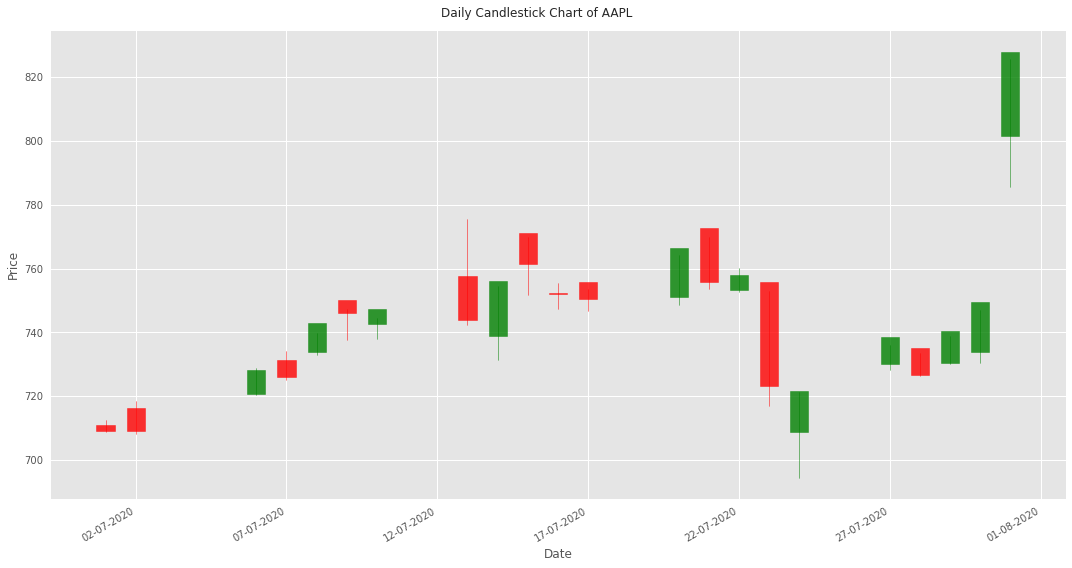

In [229]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc as mpl
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
data = rc.loc['2020-07'].copy()

data.reset_index(inplace=True)
ohlc = data.loc[:, ['Date','Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots(figsize=(15,8))

mpl(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of {}'.format(ticker))

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

In [100]:
data